In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from pythainlp import word_tokenize
from pythainlp.corpus.common import thai_stopwords

In [10]:
files = [
    'Supabase Snippet Business Marketing Articles (2024–2025).csv',
    'Supabase Snippet Economics news.csv',
    'Supabase Snippet Investment Section Articles.csv',
    'Supabase Snippet Personal Finance Articles Archive.csv'
]

In [11]:
dfs = []
for f in files:
    temp_df = pd.read_csv(f'nlp_dataset/data with sum/{f}')
    dfs.append(temp_df)
full_df = pd.concat(dfs, ignore_index=True)

In [12]:
full_df

,agency,article_id,section,subtype,published_at,headline,summary,content,url
0,thairath,2751948,business_marketing,executive_interviews,2024-01-01 07:20:00+00,“เศรษฐพุฒิ สุทธิวาทนฤพุฒิ” ผู้ว่าฯ แบงก์ชาติ ต...,NaN,เศรษฐกิจไทยในปี 2567 จะมีทิศทางอย่างไร เมื่อตล...,https://www.thairath.co.th/money/business_mark...
1,thairath,2750950,business_marketing,marketing_trends,2024-01-02 00:00:00+00,"เปิดแฟรนไชส์ ขาย ""ชาไทย"" 5 เจ้าดังไม่ยากอย่างท...",“ชาเย็น” หรือ “ชาไทย” ไม่ว่าจะถูกเรียกแบบไหน ใ...,ทั้งนี้จากข้อมูลเดอะ คอฟฟี่ คลับ ประเทศไทย ระบ...,https://www.thairath.co.th/money/business_mark...
2,thairath,2752196,business_marketing,marketing_trends,2024-01-02 11:57:51+00,ยกเลิกวิ่งรถเมล์ NGV ภายในสิ้นเดือน ม.ค.นี้ ไท...,ไทย สมายล์ บัส ประกาศยกเลิกรถ NGV ทั้งหมดภายใน...,กุลพรภัสร์ วงศ์มาจารภิญญา ประธานเจ้าหน้าที่บริ...,https://www.thairath.co.th/money/business_mark...
3,thairath,2752444,business_marketing,corporates_leadership,2024-01-03 12:01:15+00,Mickey Mouse ลิขสิทธิ์หมดอายุกลายเป็น ‘สมบัติส...,มิกกี้ เม้าส์ (Mickey Mouse) เวอร์ชันปี 1928 จ...,มิกกี้ เม้าส์ (Mickey Mouse) เวอร์ชันปี 1928 ท...,https://www.thairath.co.th/money/business_mark...
4,thairath,2752427,business_marketing,marketing_trends,2024-01-04 03:43:00+00,บิ๊กค้าปลีก ยกทัพขานรับ “Easy E-Receipt 2567” ...,เปิดปีใหม่ ห้างค้าปลีกยกทัพอัดแคมเปญพร้อมโปรโม...,โดยมาตรการ “Easy E-Receipt 2567” จะส่งผลให้เศร...,https://www.thairath.co.th/money/business_mark...
...,...,...,...,...,...,...,...,...,...
8522,thairath,2904838,personal_finance,financial_planning,2025-12-29 03:56:01+00,เครดิตไม่ดี ชีวิตแพงขึ้นโดยไม่รู้ตัว ทำไมเรื่อ...,5 พฤติกรรมพื้นฐาน ที่สร้างเครดิตได้จริง เมื่อเ...,5 พฤติกรรมพื้นฐาน ที่สร้างเครดิตได้จริง เมื่อเ...,https://www.thairath.co.th/money/personal_fina...
8523,thairath,2904923,personal_finance,financial_planning,2025-12-29 08:53:11+00,2568 ปีที่เงินตึง หนี้กด และชีวิตไม่ง่าย บทเรี...,ปี 2568 ปีที่ค่าครองชีพสูง หนี้ครัวเรือนกดทับ ...,ปี 2568 ปีที่ค่าครองชีพสูง หนี้ครัวเรือนกดทับ ...,https://www.thairath.co.th/money/personal_fina...
8524,thairath,2904961,personal_finance,financial_planning,2025-12-29 11:50:05+00,ทุกคะแนนเลือกตั้งปี 69 คือ “ต้นทุนชีวิต” คิดให...,เลือกตั้งปี 69 คือจุดเปลี่ยนคนไทย แต่กว่ารัฐบา...,เลือกตั้งปี 69 คือจุดเปลี่ยนคนไทย แต่กว่ารัฐบา...,https://www.thairath.co.th/money/personal_fina...
8525,thairath,2905106,personal_finance,financial_planning,2025-12-30 09:32:08+00,“คนละครึ่ง พลัส” 2 วันสุดท้ายใช้ยังไงให้คุ้ม ร...,"รีบเลย! สิทธิ ""คนละครึ่ง พลัส"" เหลือ 2 วันสุดท...","รีบเลย! สิทธิ ""คนละครึ่ง พลัส"" เหลือ 2 วันสุดท...",https://www.thairath.co.th/money/personal_fina...


Text(0.5, 1.0, 'Label Distribution')

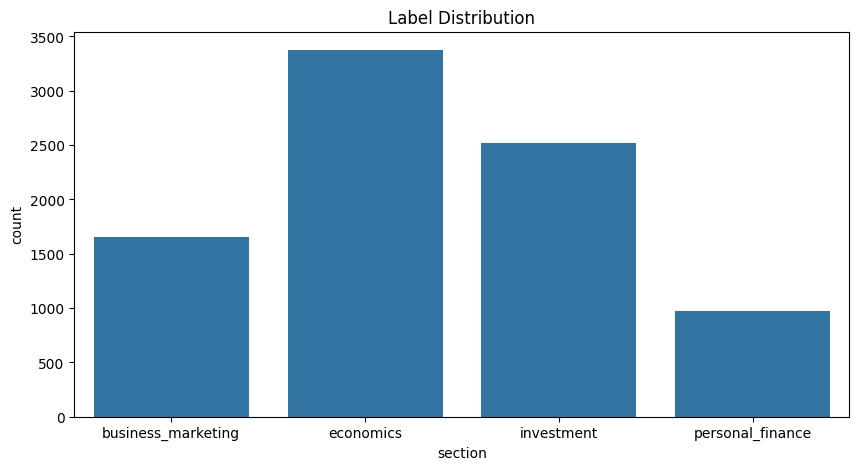

In [16]:
plt.figure(figsize=(10, 5))
sns.countplot(data=full_df, x='section')
plt.title('Label Distribution')

In [19]:
THAI_STOPWORDS = list(thai_stopwords())

def clean_thai_text(text):
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'[^\u0e00-\u0e7f a-zA-Z]', ' ', text)
    tokens = word_tokenize(text, engine='newmm')
    tokens = [t for t in tokens if t not in THAI_STOPWORDS and len(t) > 1]
    return " ".join(tokens)

print("Preprocessing text... this may take a few minutes.")
full_df['full_text'] = full_df['headline'].fillna('') + " " + full_df['content'].fillna('')
full_df['cleaned_text'] = full_df['full_text'].apply(clean_thai_text)

Preprocessing text... this may take a few minutes.


In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    full_df['cleaned_text'], full_df['section'], test_size=0.2, random_state=42, stratify=full_df['section']
)

# Feature Extraction: TF-IDF
vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Baseline Model: Naive Bayes
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


                    precision    recall  f1-score   support

business_marketing       0.83      0.75      0.79       331
         economics       0.77      0.93      0.84       675
        investment       0.94      0.90      0.92       505
  personal_finance       0.91      0.49      0.64       195

          accuracy                           0.84      1706
         macro avg       0.86      0.77      0.80      1706
      weighted avg       0.85      0.84      0.83      1706



Text(0.5, 1.0, 'Baseline Confusion Matrix')

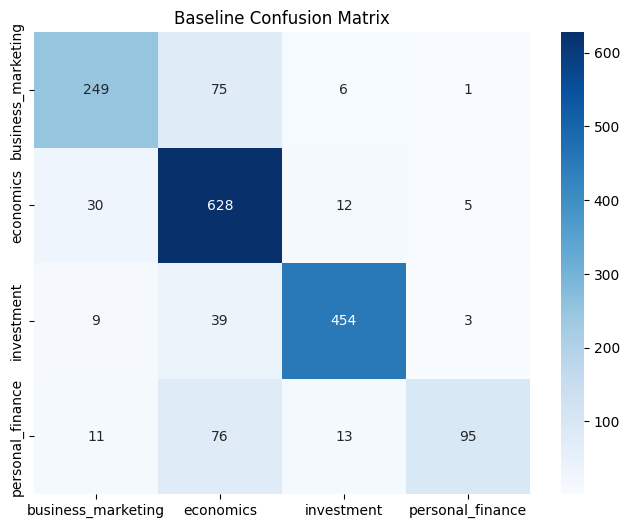

In [21]:
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Baseline Confusion Matrix')